In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

# Initialise random number generators.
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

###### Importing MNIST database

In [2]:
from keras.datasets import mnist

# Define the dimensions (in pixels) of the input images.
# Each pixel will correspond to a value of a matrix.
img_width = 28
img_heigth = 28

# Define the form of the output.
# The machine will try to classify the input in one of ten digits.
n_classes = 10

# Download the database
(in_training, out_training), (in_validation, out_validation) = mnist.load_data()

# Reshape the input data.
# The downloaded data may be modelled as a n_samples * img_width *
# * img_height array, but I need that each sample be a vector
# (i.e. just one line).
# x.shape[0] is the number of samples.
in_training = in_training.reshape(in_training.shape[0], img_width * img_heigth)
in_validation = in_validation.reshape(in_validation.shape[0], img_width * img_heigth)

# MNIST gives data as integers from 0 to 255 (= grayscale level of the pixel).
# I need it to be a value between 0 and 1, so I will rescale it.
in_training = in_training.astype("float32")
in_validation = in_validation.astype("float32")
in_training /= 255
in_validation /= 255

# The output will be a 10-entries vector, each value representing the probability
# that the corresponding digit is the correct one.
# The output data needs to be "converted" in this format.
out_training = keras.utils.to_categorical(out_training, n_classes)
out_validation = keras.utils.to_categorical(out_validation, n_classes)

Using TensorFlow backend.


###### Definition of the neural network

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
# Input layer: it must contain as much neurons as the number of inputs.
model.add(Dense(
    400,
    input_shape = (img_width * img_heigth,),
    activation = "relu"
))

# Middle layers
model.add(Dense(
    100,
    activation = "relu"
))
model.add(Dropout(0.5))

# Output layer: use the softmax activation function to convert the
# input in a probability value.
model.add(Dense(
    n_classes,
    activation = "softmax"
))

###### Network training

In [4]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

batch_size = 32
n_epochs = 5

model.compile(
    loss = keras.losses.categorical_crossentropy,
    optimizer = SGD(),
    metrics = ["accuracy"]
)

# As the training advances, save the progress of the validation
# in the "history" object.
history = model.fit(
    in_training,
    out_training,
    batch_size = batch_size,
    epochs = n_epochs,
    verbose = 1,
    validation_data = (in_validation, out_validation)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 213us/step - loss: 0.7557 - acc: 0.7775 - val_loss: 0.3106 - val_acc: 0.9179
Epoch 2/5
60000/60000 [==============================] - 13s 217us/step - loss: 0.3821 - acc: 0.8911 - val_loss: 0.2364 - val_acc: 0.9338
Epoch 3/5
60000/60000 [==============================] - 14s 227us/step - loss: 0.3082 - acc: 0.9123 - val_loss: 0.2014 - val_acc: 0.9403
Epoch 4/5
60000/60000 [==============================] - 14s 231us/step - loss: 0.2695 - acc: 0.9244 - val_loss: 0.1744 - val_acc: 0.9486
Epoch 5/5
60000/60000 [==============================] - 13s 216us/step - loss: 0.2362 - acc: 0.9333 - val_loss: 0.1557 - val_acc: 0.9531


###### Evaluation results

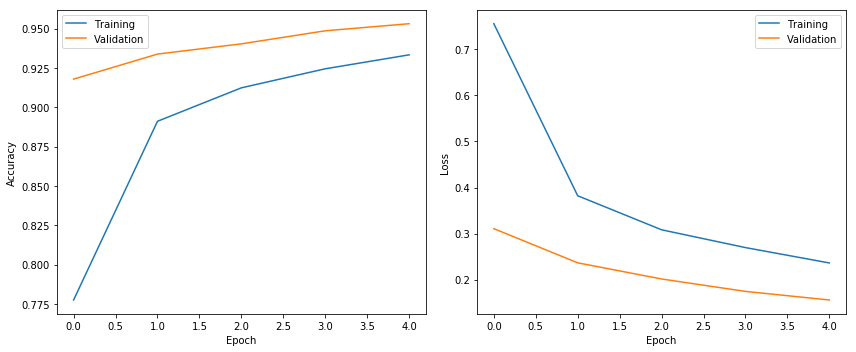

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
axes = axes.flatten()

axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].plot(history.history["acc"])
axes[0].plot(history.history["val_acc"])
axes[0].legend(["Training", "Validation"])

axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].plot(history.history["loss"])
axes[1].plot(history.history["val_loss"])
axes[1].legend(["Training", "Validation"])

fig.tight_layout()
plt.show()

###### Predictions
Now that the network is trained, we can use it to guess some digits.

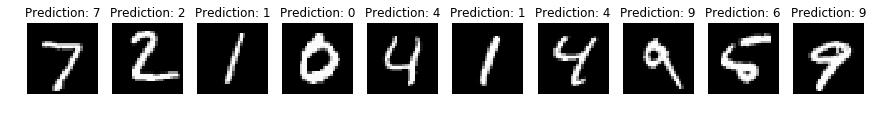

In [16]:
prediction = model.predict(in_validation)

test = in_validation.reshape(in_validation.shape[0], img_width, img_heigth, 1) #?
plt.figure(figsize = (15, 15))
for i in range(10):
    axes = plt.subplot(2, 10, i + 1)
    plt.imshow(test[i, :, :, 0], cmap = "gray")
    plt.title("Prediction: {}".format(np.argmax(prediction[i])))
    plt.axis("off")

plt.show()